**PART A**

In [ ]:
import numpy as np

# Initialize data points and centroids
X = np.array([
    [5.1, 3.5], [4.9, 3.0], [5.8, 2.7], [6.0, 3.0], [6.7, 3.1],
    [4.5, 2.3], [6.1, 2.8], [5.2, 3.2], [5.5, 2.6], [5.0, 2.0],
    [8.0, 0.5], [7.5, 0.8], [8.1, -0.1], [2.5, 3.5], [1.0, 3.0],
    [4.5, -1.0], [3.0, -0.5], [5.1, -0.2], [6.0, -1.5], [3.5, -0.1],
    [4.0, 0.0], [6.1, 0.5], [5.4, -0.5], [5.3, 0.3], [5.8, 0.6]
])

# Initial centroids
u1 = np.array([3.0, 3.0])
u2 = np.array([2.0, 2.0])
centroids = np.array([u1, u2])

# Define helper functions
def euclidean_distance(p1, p2):
    """Compute the Euclidean distance between two points."""
    return np.sqrt(np.sum((p1 - p2) ** 2))

def assign_clusters(X, centroids):
    """Assign each data point to the nearest centroid."""
    clusters = []
    for point in X:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        clusters.append(np.argmin(distances))
    return np.array(clusters)

def update_centroids(X, clusters, k):
    """Recalculate centroids as the mean of all points assigned to each cluster."""
    new_centroids = []
    for i in range(k):
        points_in_cluster = X[clusters == i]
        if len(points_in_cluster) > 0:
            new_centroid = np.mean(points_in_cluster, axis=0)
        else:
            new_centroid = centroids[i]  # Handle empty clusters
        new_centroids.append(new_centroid)
    return np.array(new_centroids)

# KMeans algorithm
def kmeans(X, initial_centroids, k=2, max_iters=100, threshold=1e-4):
    centroids = initial_centroids
    for iteration in range(max_iters):
        # Step 1: Assignment
        clusters = assign_clusters(X, centroids)
        # Step 2: Update
        new_centroids = update_centroids(X, clusters, k)
        # Step 3: Convergence check
        if np.all(np.abs(new_centroids - centroids) < threshold):
            print(f"\nConverged in {iteration + 1} iterations.")
            break
        centroids = new_centroids
    return clusters, centroids

# Run KMeans
clusters, final_centroids = kmeans(X, centroids)

# Print results
print("Final centroids:")
print(final_centroids)
print("\nCluster assignments:")
print(clusters)



Converged in 3 iterations.
Final centroids:
[[ 5.8         2.125     ]
 [ 4.2        -0.05555556]]

Cluster assignments:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0]


---
**PART B**

---



Final Centroids:
[[ 5.8         2.125     ]
 [ 4.2        -0.05555556]]


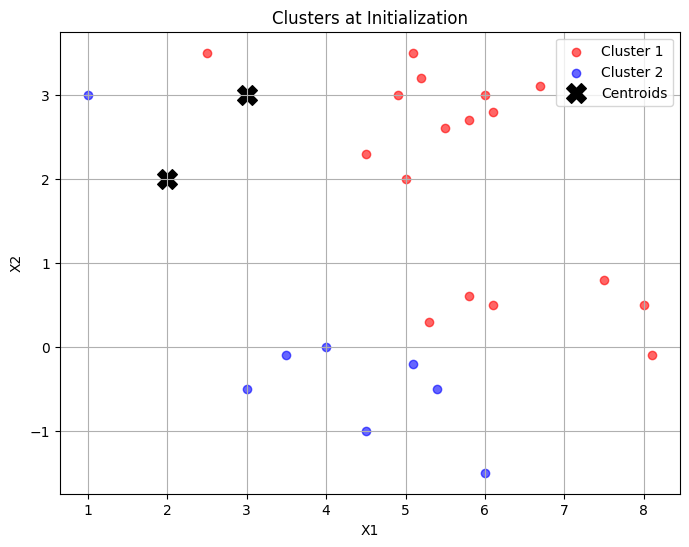

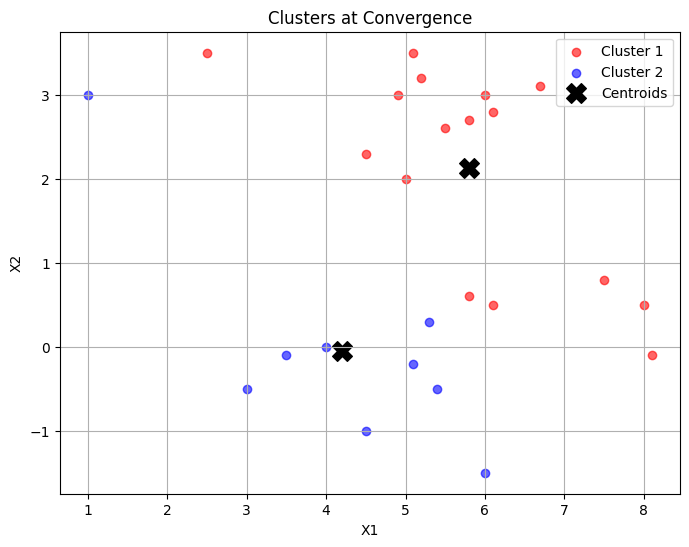

In [ ]:
import matplotlib.pyplot as plt

# Function to plot clusters
def plot_clusters(X, clusters, centroids, title):
    plt.figure(figsize=(8, 6))
    # Updated colors list with more colors to accommodate more clusters
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'black', 'gray']
    for i in range(len(centroids)):
        cluster_points = X[clusters == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i+1}', alpha=0.6)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label='Centroids')
    plt.title(title)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    plt.grid()
    plt.show()

# Display final centroids
print("Final Centroids:")
print(final_centroids)

# Plot at the start
initial_clusters = assign_clusters(X, centroids)
plot_clusters(X, initial_clusters, centroids, "Clusters at Initialization")

# Plot at the end
plot_clusters(X, clusters, final_centroids, "Clusters at Convergence")





---

**Part C**


---



Randomly Chosen Initial Centroids:
[[ 5.5  2.6]
 [ 3.  -0.5]]

Converged in 3 iterations.

Final Centroids with Provided Initialization:
[[ 5.8         2.125     ]
 [ 4.2        -0.05555556]]

Final Centroids with Random Initialization:
[[ 5.8         2.125     ]
 [ 4.2        -0.05555556]]


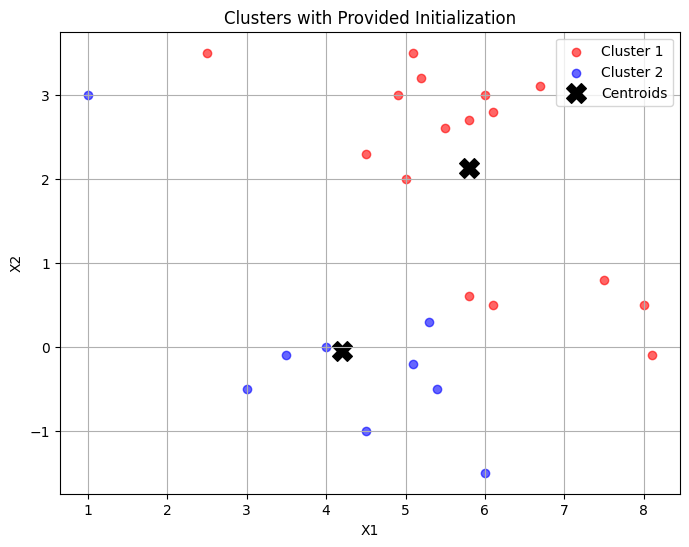

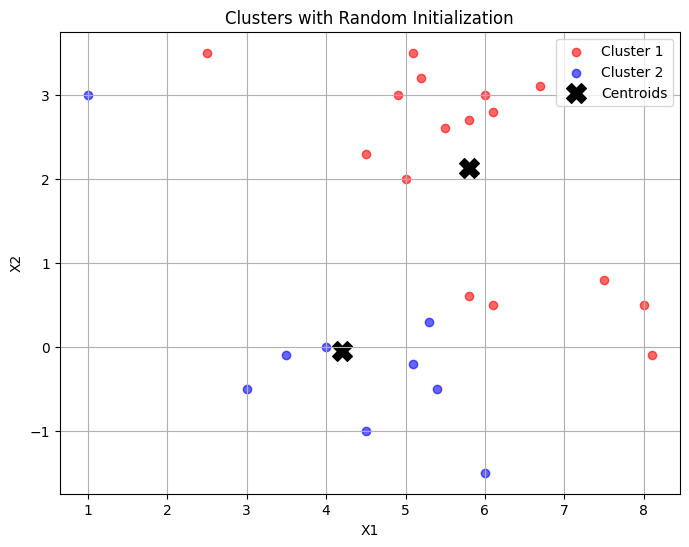

In [ ]:
import numpy as np

# Function to initialize random centroids
def random_centroids(X, k):
    """Randomly initialize centroids from the dataset."""
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

# Run KMeans with random initialization
np.random.seed(42)  # For reproducibility
random_initial_centroids = random_centroids(X, k=2)

# Print randomly initialized centroids
print("Randomly Chosen Initial Centroids:")
print(random_initial_centroids)

# Run the KMeans algorithm
random_clusters, random_final_centroids = kmeans(X, random_initial_centroids)

# Compare results
print("\nFinal Centroids with Provided Initialization:")
print(final_centroids)
print("\nFinal Centroids with Random Initialization:")
print(random_final_centroids)

# Plot comparison
plot_clusters(X, clusters, final_centroids, "Clusters with Provided Initialization")
plot_clusters(X, random_clusters, random_final_centroids, "Clusters with Random Initialization")




---
**Part D**


---





Converged in 2 iterations.

Converged in 2 iterations.

Converged in 3 iterations.

Converged in 6 iterations.

Converged in 6 iterations.

Converged in 4 iterations.

Converged in 5 iterations.

Converged in 5 iterations.

Converged in 4 iterations.

Converged in 4 iterations.


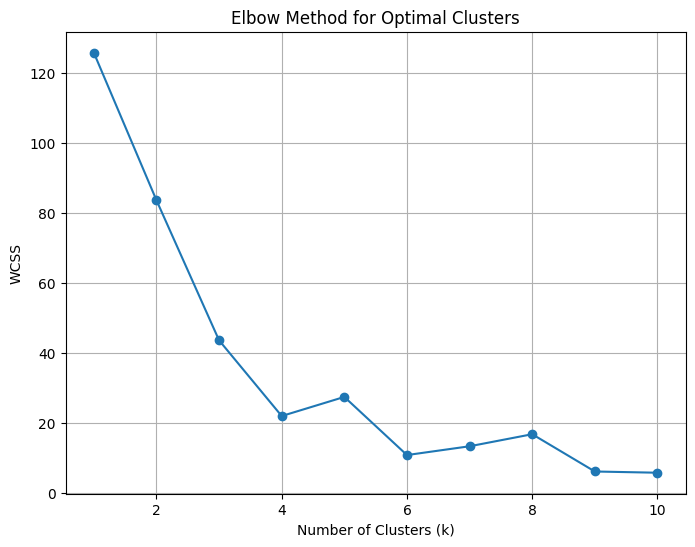


Converged in 3 iterations.


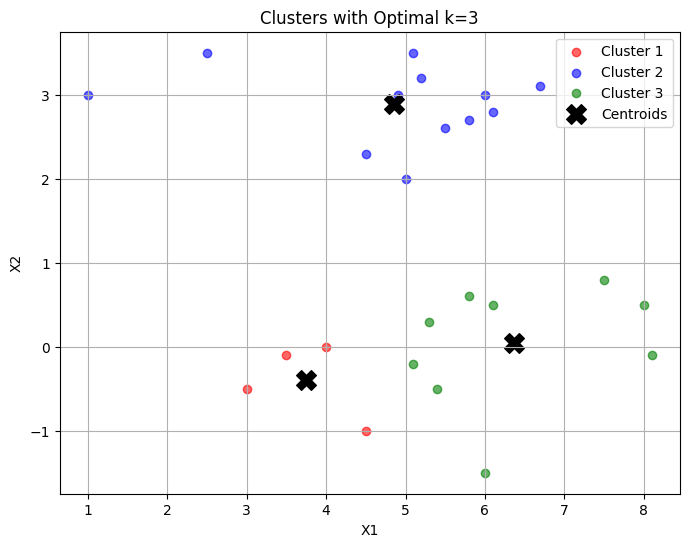

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Function to initialize random centroids
def random_centroids(X, k):
    """Randomly initialize centroids from the dataset."""
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

# Function to calculate WCSS
def calculate_wcss(X, max_k):
    wcss = []
    for k in range(1, max_k + 1):
        # Call random_centroids within calculate_wcss
        random_centroids_k = random_centroids(X, k)
        clusters, final_centroids = kmeans(X, random_centroids_k, k=k)
        wcss_k = sum(
            np.sum((X[clusters == i] - final_centroids[i])**2) for i in range(k)
        )
        wcss.append(wcss_k)
    return wcss

# Elbow method
max_k = 10  # Test up to 10 clusters
wcss = calculate_wcss(X, max_k)

# Plot WCSS vs k
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_k + 1), wcss, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.grid()
plt.show()

# Choose the optimal number of clusters (M) based on the elbow point
optimal_k = 3  # Update this after observing the elbow point

# Perform clustering with optimal M
random_optimal_centroids = random_centroids(X, optimal_k)
optimal_clusters, optimal_final_centroids = kmeans(X, random_optimal_centroids, k=optimal_k)

# Plot the resulting clusters
plot_clusters(X, optimal_clusters, optimal_final_centroids, f"Clusters with Optimal k={optimal_k}")
